In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import os

## Load dataset

In [5]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = list(iris.target_names)

In [6]:
# Define Cross-Validation parameters
N_SPLITS = 6
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

In [7]:
# Create a directory to save the trees
output_dir = "decision_trees"
os.makedirs(output_dir, exist_ok=True)

## Cross-Validation Metrics and Decision Tree Analysis
This cell performs stratified k-fold cross-validation on the Iris dataset, training decision trees and evaluating their performance through multiple metrics.

In [8]:
# Lists to store results from each fold
all_accuracies = []
all_metrics = [] # Will store a list of dictionaries

# --- 2. & 3. Cross-Validation Loop (Train, Save, Predict, Evaluate) ---

for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"\n--- Fold {fold+1}/{N_SPLITS} ---")
    
    # 1. Split data for this fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 2. Construct and save the decision tree
    # Initialize the classifier
    clf = DecisionTreeClassifier(random_state=42)
    
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Save the tree as a .png file
    plt.figure(figsize=(20, 12))
    plot_tree(clf, 
              filled=True, 
              rounded=True, 
              feature_names=feature_names, 
              class_names=class_names,
              fontsize=10)
    
    save_path = os.path.join(output_dir, f'iris_tree_fold_{fold+1}.png')
    plt.title(f"Decision Tree - Fold {fold+1}", fontsize=20)
    plt.savefig(save_path)
    plt.close() # Close the plot to avoid displaying it inline
    print(f"Saved tree for fold {fold+1} to {save_path}")

    # 3. Predict on the test set and compute metrics
    y_pred = clf.predict(X_test)
    
    # --- Overall Accuracy ---
    acc = accuracy_score(y_test, y_pred)
    all_accuracies.append(acc)
    print(f"Accuracy: {acc:.4f}")
    
    # --- Class-wise Metrics (Precision, Recall, Specificity) ---
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
    
    # Calculate metrics for each class
    for i, class_name in enumerate(class_names):
        
        # True Positives, False Positives, False Negatives
        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        # True Negatives is the sum of all cells NOT in the class's row or column
        TN = cm.sum() - (TP + FP + FN)
        
        # Calculate Precision, Recall, Specificity
        # Use try-except to handle potential division by zero
        
        # Precision (TP / (TP + FP))
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
        
        # Recall / Sensitivity (TP / (TP + FN))
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
        
        # Specificity (TN / (TN + FP))
        specificity = TN / (TN + FP) if (TN + FP) > 0 else 0.0
        
        # Store results
        all_metrics.append({
            'fold': fold + 1,
            'class': class_name,
            'precision': precision,
            'recall': recall,
            'specificity': specificity
        })

print("\n--- Cross-Validation Complete ---")


--- Fold 1/6 ---
Saved tree for fold 1 to decision_trees/iris_tree_fold_1.png
Accuracy: 1.0000

--- Fold 2/6 ---
Saved tree for fold 2 to decision_trees/iris_tree_fold_2.png
Accuracy: 0.9600

--- Fold 3/6 ---
Saved tree for fold 3 to decision_trees/iris_tree_fold_3.png
Accuracy: 0.8800

--- Fold 4/6 ---
Saved tree for fold 4 to decision_trees/iris_tree_fold_4.png
Accuracy: 0.9200

--- Fold 5/6 ---
Saved tree for fold 5 to decision_trees/iris_tree_fold_5.png
Accuracy: 0.9200

--- Fold 6/6 ---
Saved tree for fold 6 to decision_trees/iris_tree_fold_6.png
Accuracy: 0.8800

--- Cross-Validation Complete ---


## Analysis

### 4b. Quantitative analysis

In [9]:
# --- 4. Analysis ---

# --- 4b. Quantitative Assessment (Mean, Variance, Box Plots) ---
print("\n--- 4b. Quantitative Assessment ---")

# Convert results to Pandas DataFrames for easy analysis
df_metrics = pd.DataFrame(all_metrics)
df_accuracy = pd.DataFrame({'accuracy': all_accuracies})

# Calculate and print Mean and Variance
print("\n--- Mean and Variance of Metrics ---")

# Accuracy
print("\nOverall Accuracy:")
print(f"  Mean: {df_accuracy['accuracy'].mean():.4f}")
print(f"  Variance: {df_accuracy['accuracy'].var():.4f}")


--- 4b. Quantitative Assessment ---

--- Mean and Variance of Metrics ---

Overall Accuracy:
  Mean: 0.9267
  Variance: 0.0022


### 4a. Qualitative analysis


Overall Accuracy:
  Mean: 0.9267
  Variance: 0.0022

Class-wise Metrics (Mean):
            precision    recall  specificity
class                                       
setosa       1.000000  1.000000     1.000000
versicolor   0.890278  0.902778     0.939951
virginica    0.903505  0.881944     0.949755

Class-wise Metrics (Variance):
            precision    recall  specificity
class                                       
setosa       0.000000  0.000000     0.000000
versicolor   0.009024  0.007253     0.002950
virginica    0.006502  0.011246     0.001993

Generating box plots...


/tmp/ipykernel_135190/129829646.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_accuracy['accuracy'], palette='viridis')
/tmp/ipykernel_135190/129829646.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_metrics, x='class', y='precision', palette='viridis')
/tmp/ipykernel_135190/129829646.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_metrics, x='class', y='recall', palette='viridis')
/tmp/ipykernel_135190/129829646.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be r

Saved box plots to metrics_box_plots.png


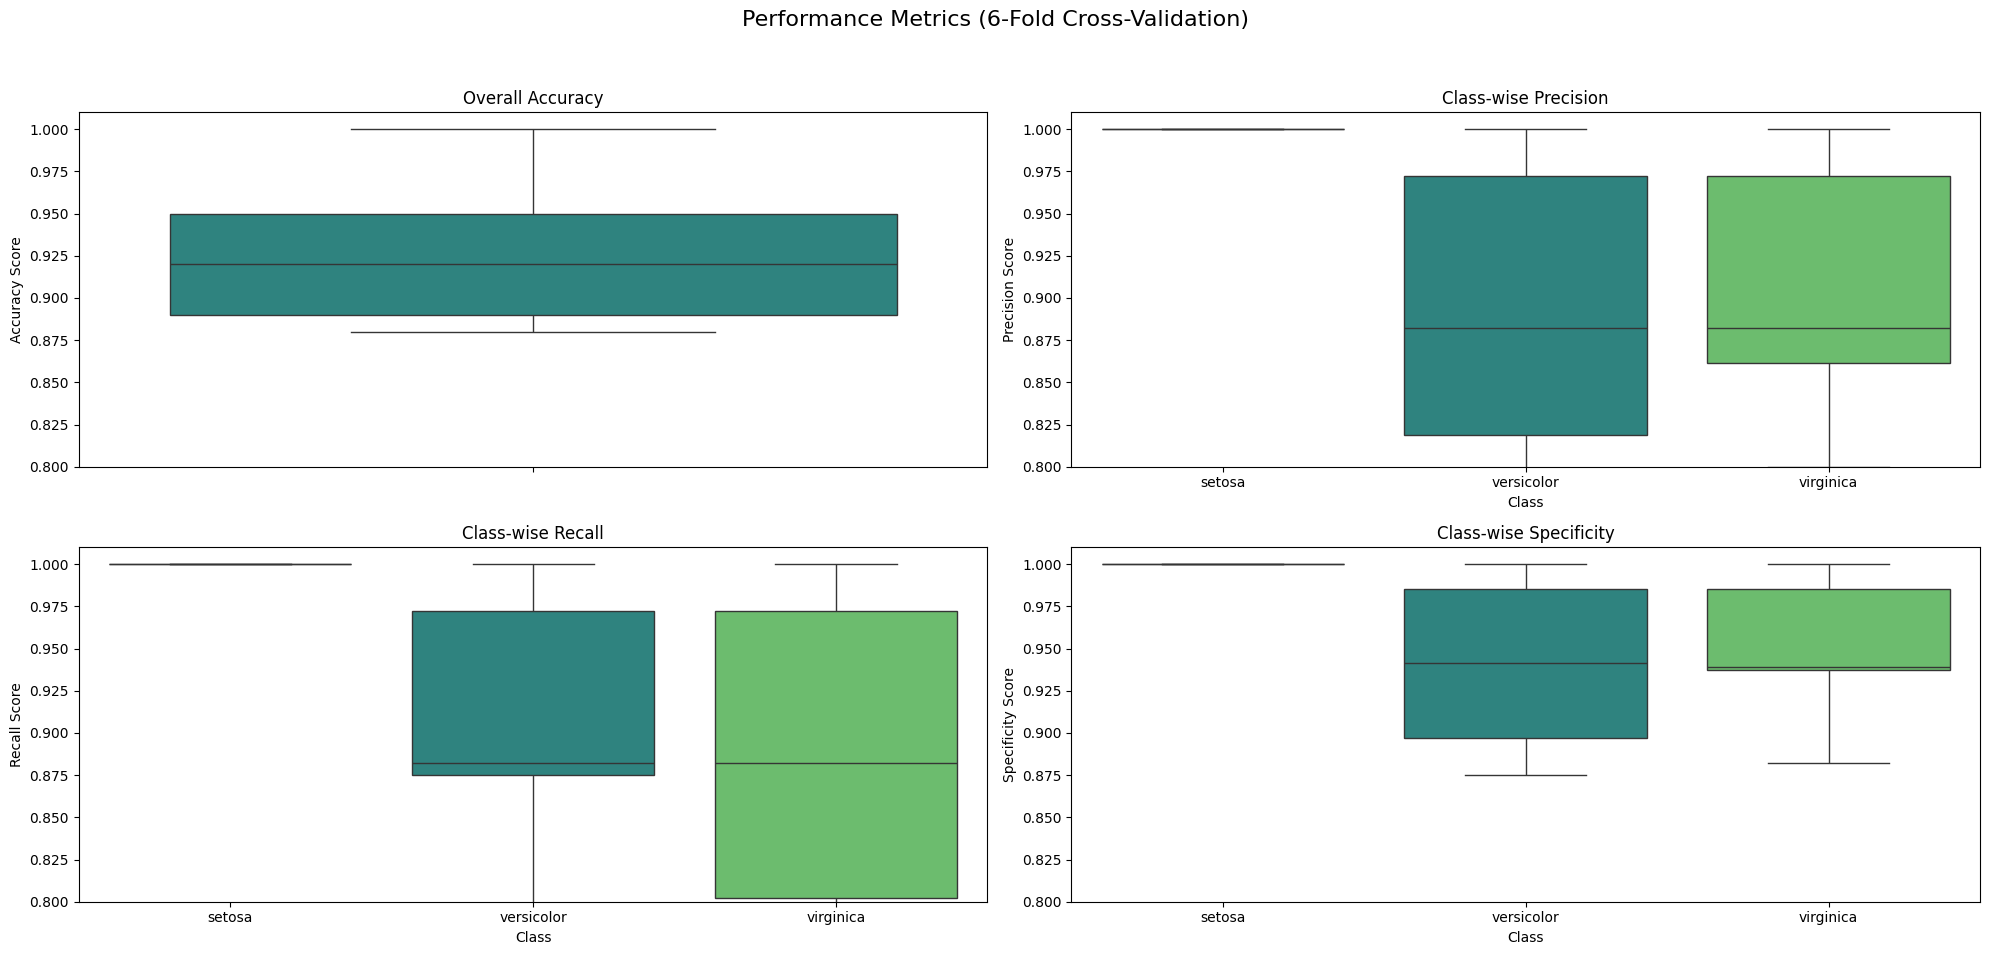


--- 4a. Qualitative Assessment ---
Please open the 6 .png files saved in the 'decision_trees' directory.
Compare them to assess their differences (see written analysis for guidance).

--- Analysis Finished ---


In [10]:
# Accuracy
print("\nOverall Accuracy:")
print(f"  Mean: {df_accuracy['accuracy'].mean():.4f}")
print(f"  Variance: {df_accuracy['accuracy'].var():.4f}")

# Class-wise Metrics
print("\nClass-wise Metrics (Mean):")
print(df_metrics.groupby('class')[['precision', 'recall', 'specificity']].mean())

print("\nClass-wise Metrics (Variance):")
print(df_metrics.groupby('class')[['precision', 'recall', 'specificity']].var())

# --- Draw Box Plots ---
print("\nGenerating box plots...")

# Set up the figure for plots
plt.figure(figsize=(20, 10))
plt.suptitle("Performance Metrics (6-Fold Cross-Validation)", fontsize=16)

# 1. Box Plot for Overall Accuracy
plt.subplot(2, 2, 1)
sns.boxplot(y=df_accuracy['accuracy'], palette='viridis')
plt.title("Overall Accuracy")
plt.ylabel("Accuracy Score")
plt.ylim(0.8, 1.01) # Set Y-axis limits for better visibility

# 2. Box Plot for Precision
plt.subplot(2, 2, 2)
sns.boxplot(data=df_metrics, x='class', y='precision', palette='viridis')
plt.title("Class-wise Precision")
plt.xlabel("Class")
plt.ylabel("Precision Score")
plt.ylim(0.8, 1.01)

# 3. Box Plot for Recall
plt.subplot(2, 2, 3)
sns.boxplot(data=df_metrics, x='class', y='recall', palette='viridis')
plt.title("Class-wise Recall")
plt.xlabel("Class")
plt.ylabel("Recall Score")
plt.ylim(0.8, 1.01)

# 4. Box Plot for Specificity
plt.subplot(2, 2, 4)
sns.boxplot(data=df_metrics, x='class', y='specificity', palette='viridis')
plt.title("Class-wise Specificity")
plt.xlabel("Class")
plt.ylabel("Specificity Score")
plt.ylim(0.8, 1.01) # Specificity is typically high

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plot_save_path = "metrics_box_plots.png"
plt.savefig(plot_save_path)
print(f"Saved box plots to {plot_save_path}")

# Display the plots
plt.show()

print("\n--- 4a. Qualitative Assessment ---")
print("Please open the 6 .png files saved in the 'decision_trees' directory.")
print("Compare them to assess their differences (see written analysis for guidance).")

print("\n--- Analysis Finished ---")